In [1]:
import pandas as pd
from pycaret.classification import *
from pycaret.classification import ClassificationExperiment
exp = ClassificationExperiment()


data = pd.read_csv('../../data/dataset.csv')

# shuffle the DataFrame rows
data = data.sample(frac = 1)
data.head()

s = setup(data, target = 'signal', session_id = 123, use_gpu=True)
best = compare_models()

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Warning] Using sparse features with CUDA is currently not supported.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset migh

[LightGBM] [Fatal] CUDA Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_CUDAP=1
[LightGBM] [Fatal] CUDA Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_CUDAP=1
[LightGBM] [Fatal] CUDA Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_CUDAP=1
[LightGBM] [Fatal] CUDA Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_CUDAP=1
[LightGBM] [Fatal] CUDA Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_CUDAP=1


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Warning] Using sparse features with CUDA is currently not supported.
[LightGBM] [Info] Number of positive: 1, number of negative: 1


[LightGBM] [Fatal] CUDA Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_CUDAP=1


,Description,Value
0,Session id,123
1,Target,signal
2,Target type,Multiclass
3,Target mapping,"both: 0, dont_trade: 1, long: 2, short: 3"
4,Original data shape,"(34312, 43)"
5,Transformed data shape,"(34312, 43)"
6,Transformed train set shape,"(24018, 43)"
7,Transformed test set shape,"(10294, 43)"
8,Numeric features,42
9,Rows with missing values,49.3%


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Warning] Using sparse features with CUDA is currently not supported.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset migh

[LightGBM] [Fatal] CUDA Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_CUDAP=1
[LightGBM] [Fatal] CUDA Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_CUDAP=1


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.6180,0.8122,0.6180,0.6106,0.5964,0.4005,0.4113,0.8910
rf,Random Forest Classifier,0.5991,0.7953,0.5991,0.5876,0.5767,0.3720,0.3810,1.6370
lightgbm,Light Gradient Boosting Machine,0.5875,0.7843,0.5875,0.5741,0.5659,0.3536,0.3632,1.1010
gbc,Gradient Boosting Classifier,0.5672,0.7564,0.5672,0.5542,0.5392,0.3138,0.3273,71.0960
ada,Ada Boost Classifier,0.5438,0.7046,0.5438,0.5263,0.5152,0.2766,0.2896,3.6800
lr,Logistic Regression,0.5217,0.6521,0.5217,0.5467,0.4510,0.1901,0.2426,14.4420
knn,K Neighbors Classifier,0.5127,0.6820,0.5127,0.4906,0.4864,0.2334,0.2425,0.3460
lda,Linear Discriminant Analysis,0.5102,0.6458,0.5102,0.5226,0.4488,0.1788,0.2176,0.2850
ridge,Ridge Classifier,0.5019,0.0000,0.5019,0.4999,0.4273,0.1534,0.1996,0.3340
nb,Naive Bayes,0.4840,0.6637,0.4840,0.4658,0.4603,0.2046,0.2116,0.0930


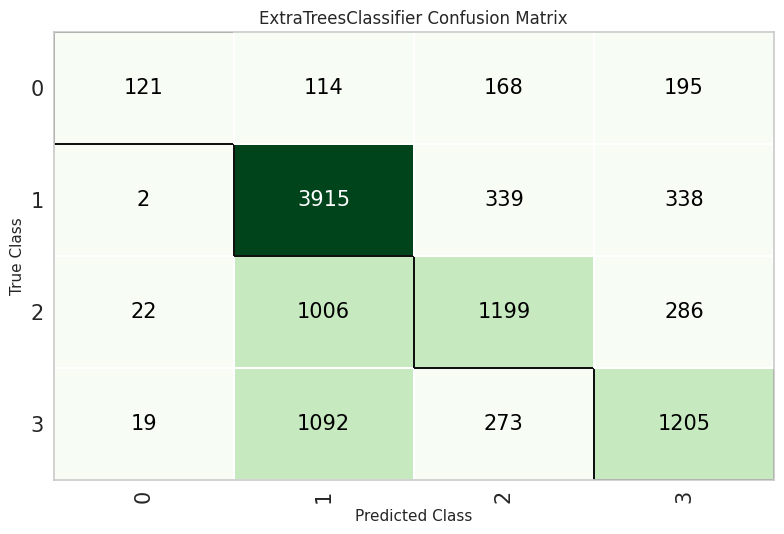

In [2]:
# plot confusion matrix
plot_model(best, plot = 'confusion_matrix')

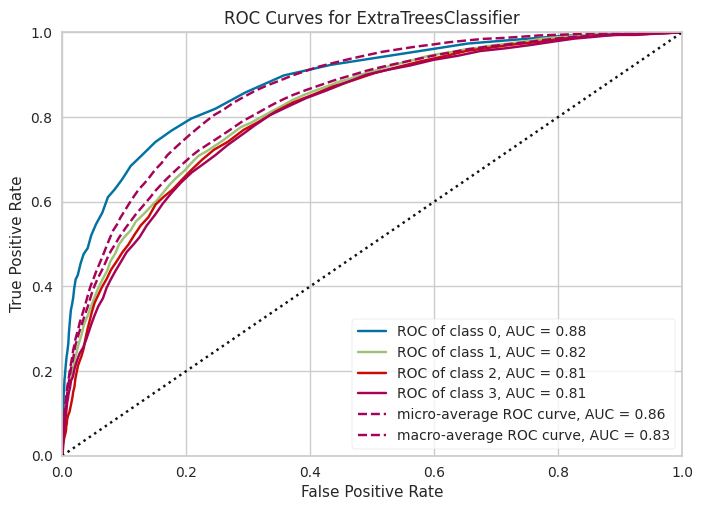

In [3]:
# plot AUC
plot_model(best, plot = 'auc')

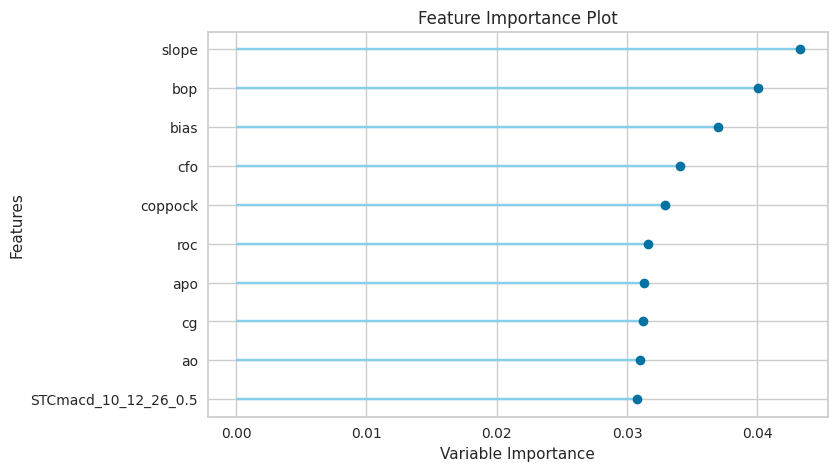

In [4]:
# plot feature importance
plot_model(best, plot = 'feature')